## Mission 2

이번 미션에서는 start codon 주변에서 ribosome-protected fragment의 분포를 한 번 살펴보겠습니다. 보통은 RPF의 5'-end 분포가 start codon 앞 15nt 정도에서부터 본격적으로 많이 나오고, 거기서부터 CDS를 걸쳐서 3nt 주기로 올록볼록한 패턴이 나타납니다.

이 그림을 제대로 그리려면 genome coordinate를 start codon을 기준으로 변환해서 작업해야 하지만, 이번 미션에서는 난이도를 적절히 내리기 위해서 start codon이 포함된 exon에 존재하는 5' end만 추려서 작업하도록 합시다. (여유가 좀 있어서 난이도를 적당히 올리고 싶은 분들은 negative strand를 포함할 수도 있고, start codon과 다른 exon에 있는 경우를 포함할 수도 있습니다. 또한 APPRIS 등을 기반으로 해서 transcript 중에 가장 )

In [3]:
%cd /casa/chemin/p/bioinfo1_2023/binfo1-work/

/casa/chemin/p/bioinfo1_2023/binfo1-work


In [4]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


In [5]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!grep '	exon	.*	+	' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


In [6]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

In [8]:
!conda install -y bioawk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /casa/chemin/miniconda3/envs/bioinfo1

  added / updated specs:
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h7132678_7         196 KB  bioconda
    ca-certificates-2023.01.10 |       h06a4308_0         120 KB
    certifi-2022.12.7          |  py310h06a4308_0         150 KB
    ------------------------------------------------------------
                                           Total:         466 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h7132678_7

The following packages will be SUPERSEDED by a higher-priority channel:

  ca

In [9]:
!(samtools view -H RPF-siLuc.bam; \
  samtools view -F20 RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

In [10]:
!ls -al *RPF-siLuc.bam

-rw-r--r-- 1 chemin narry  554373645 May  5 23:34 filtered-RPF-siLuc.bam
-rw-r--r-- 1 chemin narry 1055123479 May  2 09:50 RPF-siLuc.bam


In [11]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [12]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


In [2]:
import pandas as pd

In [16]:
df_luc = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-work/fivepcounts-filtered-RPF-siLuc.txt', sep='\t', header = None)
df_luc

,0,1,2,3,4,5,6,7,8,9
0,chr1,4878048,4878049,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+
1,chr1,4878048,4878049,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+
2,chr1,4878077,4878078,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+
3,chr1,4878077,4878078,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+
4,chr1,4878077,4878078,1,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+
...,...,...,...,...,...,...,...,...,...,...
340494,chrY,87129502,87129503,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340495,chrY,87129574,87129575,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340496,chrY,87563721,87563722,1,chrY,87563647,87563779,ENSMUST00000186493.2,87563661,+
340497,chrY,88065994,88065995,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+


In [17]:
df_luc['relStartPos'] = df_luc[1] - df_luc[8]
df_luc

,0,1,2,3,4,5,6,7,8,9,relStartPos
0,chr1,4878048,4878049,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-88
1,chr1,4878048,4878049,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-88
2,chr1,4878077,4878078,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-59
3,chr1,4878077,4878078,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-59
4,chr1,4878077,4878078,1,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+,-59
...,...,...,...,...,...,...,...,...,...,...,...
340494,chrY,87129502,87129503,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+,-12
340495,chrY,87129574,87129575,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+,60
340496,chrY,87563721,87563722,1,chrY,87563647,87563779,ENSMUST00000186493.2,87563661,+,60
340497,chrY,88065994,88065995,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+,-12


In [18]:
%cd /casa/chemin/p/bioinfo1_2023/binfo1-work/

/casa/chemin/p/bioinfo1_2023/binfo1-work


In [19]:
!(samtools view -H RPF-siLin28a.bam; \
  samtools view -F20 RPF-siLin28a.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLin28a.bam

In [20]:
!bedtools genomecov -ibam filtered-RPF-siLin28a.bam -bg -5 > fivepcounts-RPF-siLin28a.bed
!head fivepcounts-RPF-siLin28a.bed

chr1	3123359	3123360	1
chr1	3124284	3124285	1
chr1	3188296	3188297	1
chr1	3221546	3221547	1
chr1	3221549	3221550	2
chr1	3221868	3221869	1
chr1	3222153	3222154	1
chr1	3222413	3222415	1
chr1	3222638	3222639	1
chr1	3224556	3224557	1


In [21]:
!bedtools intersect -a fivepcounts-RPF-siLin28a.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLin28a.txt
!head fivepcounts-filtered-RPF-siLin28a.txt

chr1	4878043	4878044	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878056	4878057	3	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878056	4878057	3	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878056	4878057	3	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878074	4878075	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878074	4878075	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878074	4878075	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878089	4878090	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878089	4878090	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878089	4878090	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+


In [22]:
df_lin28a = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-work/fivepcounts-filtered-RPF-siLin28a.txt', sep='\t', header = None)
df_lin28a

,0,1,2,3,4,5,6,7,8,9
0,chr1,4878043,4878044,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+
1,chr1,4878056,4878057,3,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+
2,chr1,4878056,4878057,3,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+
3,chr1,4878056,4878057,3,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+
4,chr1,4878074,4878075,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+
...,...,...,...,...,...,...,...,...,...,...
280276,chrY,1010646,1010647,2,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+
280277,chrY,1010649,1010650,2,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+
280278,chrY,1010655,1010656,1,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+
280279,chrY,1010673,1010674,1,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+


In [23]:
df_lin28a['relStartPos'] = df_lin28a[1] - df_lin28a[8]
df_lin28a

,0,1,2,3,4,5,6,7,8,9,relStartPos
0,chr1,4878043,4878044,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-93
1,chr1,4878056,4878057,3,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-80
2,chr1,4878056,4878057,3,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-80
3,chr1,4878056,4878057,3,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+,-80
4,chr1,4878074,4878075,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-62
...,...,...,...,...,...,...,...,...,...,...,...
280276,chrY,1010646,1010647,2,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+,30
280277,chrY,1010649,1010650,2,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+,33
280278,chrY,1010655,1010656,1,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+,39
280279,chrY,1010673,1010674,1,chrY,1010542,1010685,ENSMUST00000091197.4,1010616,+,57


In [24]:
rbfp_luc_cov = df_luc.groupby('relStartPos')[3].sum()
rbfp_luc_cov

In [26]:
rbfp_lin28a_cov = df_lin28a.groupby('relStartPos')[3].sum()
rbfp_lin28a_cov

relStartPos
-7524     2
-7523     1
-7521     1
-7520     9
-7519    41
         ..
 6087     1
 6264     2
 6265     1
 6297     1
 6599     1
Name: 3, Length: 5703, dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [32]:
def rbfp5_cov(df, posmin, posmax):
    cov = df[df.relStartPos.isin(range(posmin, posmax + 1))].groupby('relStartPos')[3].sum()
    return cov

In [34]:
a = zip(['siLuc', 'siLin28a'], [rbfp5_luc_cov, rbfp5_lin28a_cov])
list(a)

[('siLuc',
  relStartPos
  -100     704
  -99      743
  -98      976
  -97      877
  -96      888
          ... 
   96     3570
   97      655
   98     2965
   99     4494
   100     520
  Name: 3, Length: 201, dtype: int64),
 ('siLin28a',
  relStartPos
  -100     542
  -99      566
  -98      743
  -97      637
  -96      720
          ... 
   96     2915
   97      606
   98     1874
   99     3427
   100     421
  Name: 3, Length: 201, dtype: int64)]

Text(0.5, 0, "Relative position to start codon of 5'-end of reads")

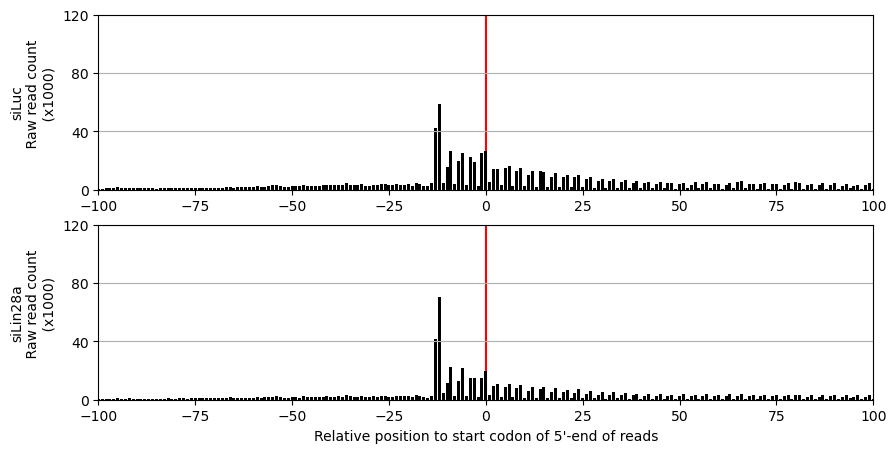

In [69]:
p_min, p_max = -100, 100

rbfp5_luc_cov = rbfp5_cov(df_luc, p_min, p_max)
rbfp5_lin28a_cov = rbfp5_cov(df_lin28a, p_min, p_max)

fig, axes = plt.subplots(2, 1, figsize = (10,5))

for i, (sample, cov) in enumerate(zip(['siLuc', 'siLin28a'], [rbfp5_luc_cov, rbfp5_lin28a_cov])):
    axes[i].bar(cov.index, cov.div(1000), color='black', zorder=1)
    axes[i].axvline(0, color = 'r', zorder = 0.5)
    axes[i].grid(axis = 'y', linestyle = '-')

    axes[i].set_xlim(p_min, p_max)
    axes[i].set_ylim(0,120)
    axes[i].set_yticks(range(0,121,40))

    axes[i].set_ylabel(f"""{sample}
    Raw read count
    (x1000)""")

axes[1].set_xlabel("Relative position to start codon of 5'-end of reads")


Text(0.5, 0, "Relative position to start codon of 5'-end of reads")

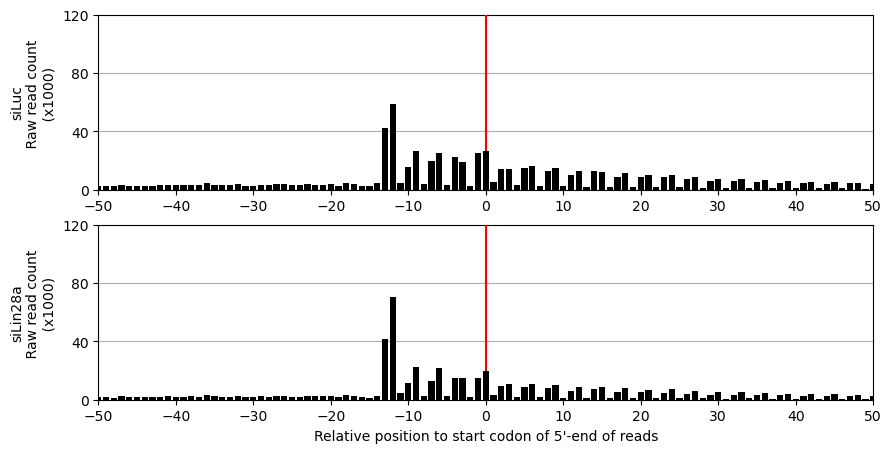

In [70]:
p_min, p_max = -50, 50

rbfp5_luc_cov = rbfp5_cov(df_luc, p_min, p_max)
rbfp5_lin28a_cov = rbfp5_cov(df_lin28a, p_min, p_max)

fig, axes = plt.subplots(2, 1, figsize = (10,5))

for i, (sample, cov) in enumerate(zip(['siLuc', 'siLin28a'], [rbfp5_luc_cov, rbfp5_lin28a_cov])):
    axes[i].bar(cov.index, cov.div(1000), color='black', zorder=10)
    axes[i].axvline(0, color = 'r', zorder = 5)
    axes[i].grid(axis = 'y', linestyle = '-', zorder = 1)

    axes[i].set_xlim(p_min, p_max)
    axes[i].set_ylim(0,120)
    axes[i].set_yticks(range(0,121,40))
    axes[i].set_xticks(range(-50,51,10))

    axes[i].set_ylabel(f"""{sample}
    Raw read count
    (x1000)""")

axes[1].set_xlabel("Relative position to start codon of 5'-end of reads")
